In [5]:
import numpy as np
import matplotlib.pyplot as plt
import csv


In [19]:
class Results():
    def __init__(self, path):
        self.path = '/home/arclab/sac_composition/code/log/{0}/progress.csv'.format(path)
        self.data_dict = {}
        self.set_dict()
        
    def set_dict(self):
        data_list = []
        with open(self.path, mode='r') as infile:
            reader = csv.reader(infile)
            for row in reader:
                data_list.append(row)
        num_points = len(data_list)

        for i, title in enumerate(data_list[0]):
            self.data_dict[title] = []
            for r in range(1, num_points):
                self.data_dict[title].append(data_list[r][i])  
    
    def smooth_reward_curve(self, x, y):
        
        halfwidth = int(np.ceil(len(x) / 60))  # Halfwidth of our smoothing convolution
        k = halfwidth
        xsmoo = x
        ysmoo = np.convolve(y, np.ones(2 * k + 1), mode='same') / np.convolve(np.ones_like(y), np.ones(2 * k + 1),
           mode='same')
        return xsmoo, ysmoo
    
    def graph_decay(self):
        decay = 0.3e-6
        instructive = 0.5
        episodes = [int(ep) for ep in self.data_dict['episodes']]
        
        chances = [instructive * (1 / (1 + decay * count)) for count in episodes]
        plt.plot(episodes, chances)
    
    def graph(self):
        
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(13,13))
        fig.suptitle(self.path)
        epochs = [int(ep) for ep in self.data_dict['epoch']]
        
        rollout_ret = [float(loss) for loss in self.data_dict['return-average']]
        ax1.set_title('return-average')
        ax1.set_ylabel('reward')
        x, y =epochs, rollout_ret
        x, y = self.smooth_reward_curve(epochs, rollout_ret)
        ax1.plot(x, y , '-')
        
        logpi = [float(loss) for loss in self.data_dict['log-pi-mean']]
        ax2.set_title('log-pi-mean')
        ax2.set_ylabel("log pi")
        x, y = epochs, logpi
        x, y = self.smooth_reward_curve(epochs, logpi)
        ax2.plot(x, y, '-')
    
        bell_err1 = [float(loss) for loss in self.data_dict['mean-sq-bellman-error1']]
        ax3.set_title('mean-sq-bellman-error1')
        ax3.set_ylabel("error")
        x, y = epochs, bell_err1
        x, y = self.smooth_reward_curve(epochs, bell_err1)
        ax3.plot(x, y, '-')
    
        bell_err2 = [float(loss) for loss in self.data_dict['mean-sq-bellman-error2']]
        ax4.set_title('mean-sq-bellman-error2')
        ax4.set_ylabel("error")
        x, y = epochs, bell_err2
        x, y = self.smooth_reward_curve(epochs, bell_err2)
        ax4.plot(x, y, '-')
        
        plt.show()

<IPython.core.display.Javascript object>


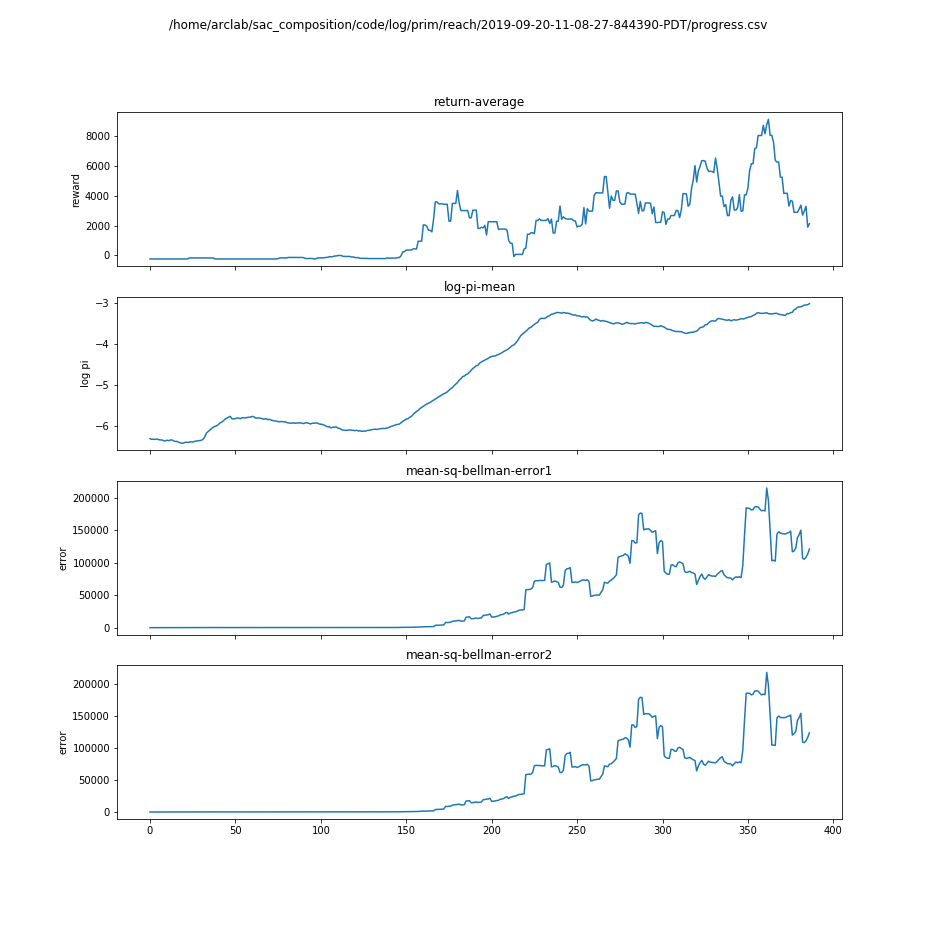

In [32]:
r = Results('prim/reach/2019-09-20-11-08-27-844390-PDT')
r.graph()


<IPython.core.display.Javascript object>


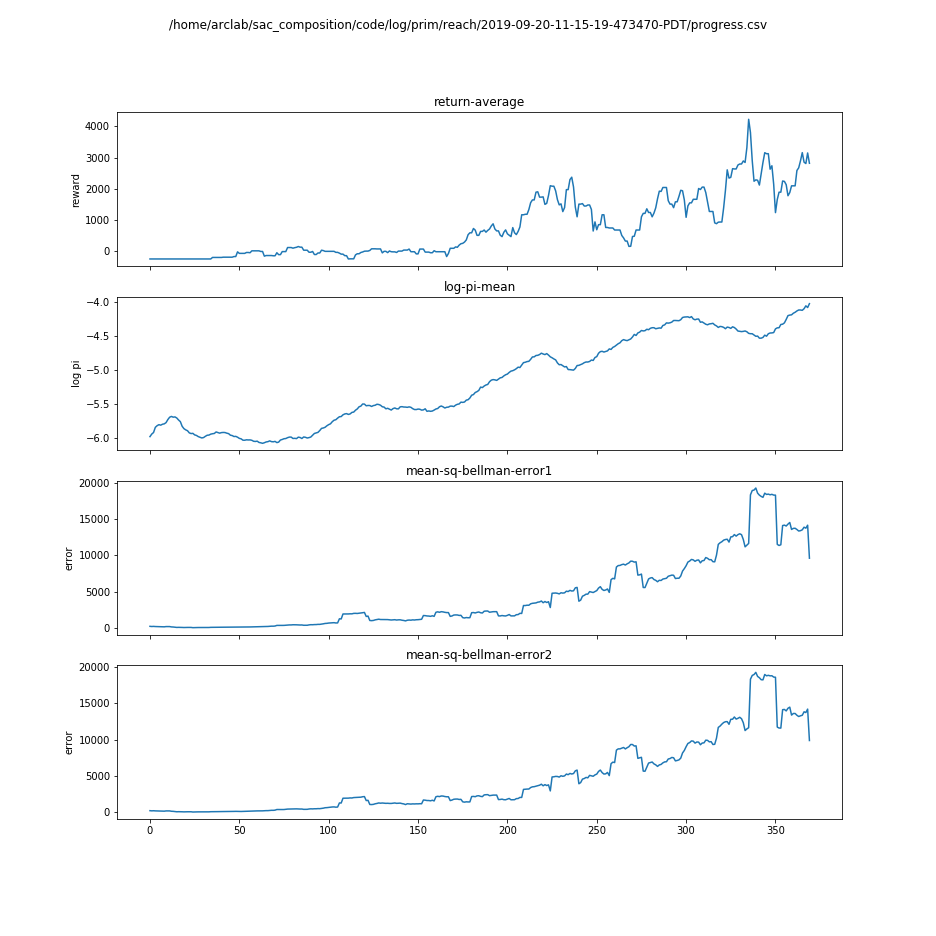

In [33]:
r = Results('prim/reach/2019-09-20-11-15-19-473470-PDT')
r.graph()


<IPython.core.display.Javascript object>


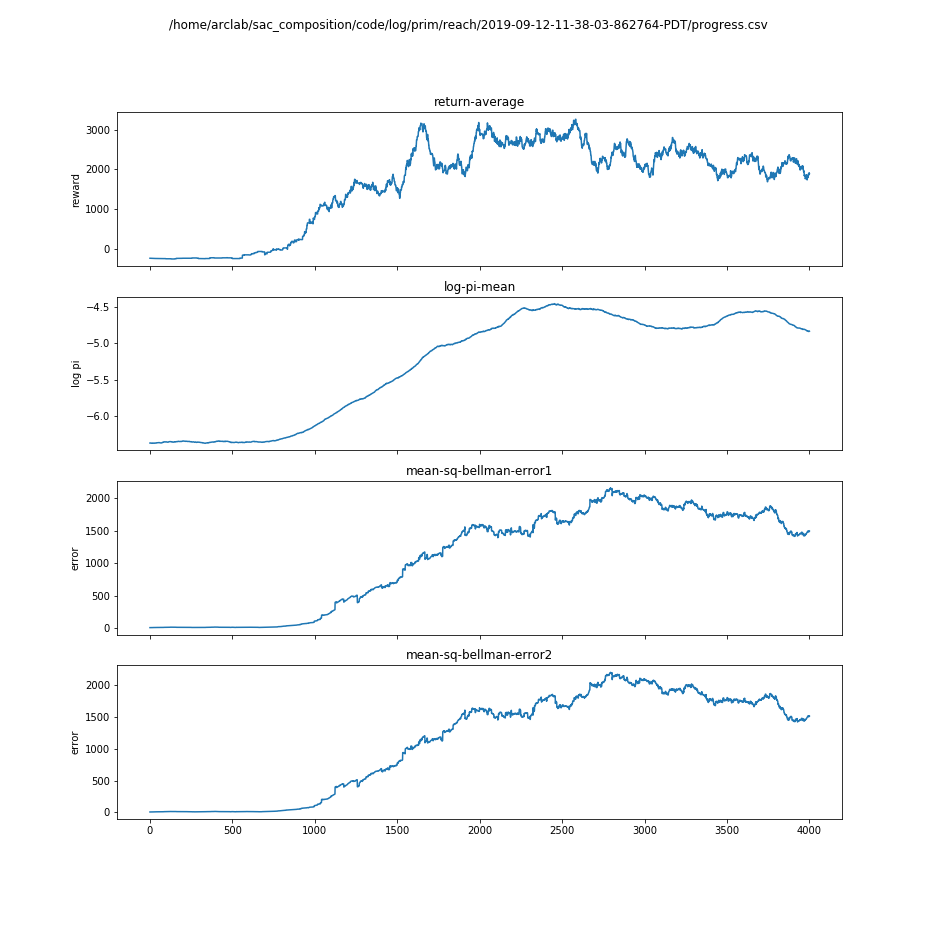

In [21]:
r = Results('prim/reach/2019-09-12-11-38-03-862764-PDT')
r.graph()



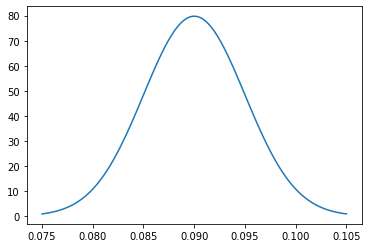

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0.09
sigma = 0.005
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

0.5
0.16666666666666666
0.03846213018661825


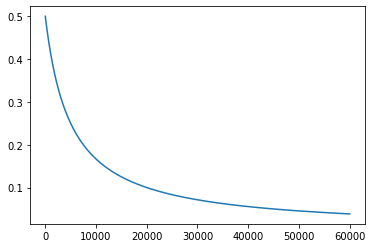

In [23]:
decay = 2e-4
instructive = 0.5
episodes = [i for i in range(60000)]

chances = [instructive * (1 / (1 + decay * count)) for count in episodes]
plt.plot(episodes, chances)
# print(chances[200000])
print(chances[0])
print(chances[10000])
print(chances[-1])


In [127]:
150*5000

1500000

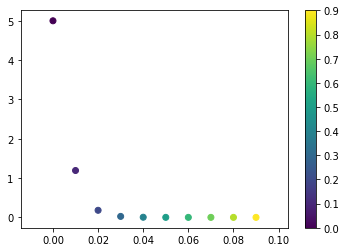

In [13]:
x = np.array([i for i in np.arange(0, 0.1, 0.01)])
y =  5 * (1 - np.tanh(100.0 * x))
c = np.array([i for i in np.arange(0, 1, 0.1)])
plt.scatter(x,y, c=c)
plt.colorbar()

In [13]:
test = np.linalg.norm(np.array((0.0,0.0,0.1)))
print(test)
print(5 * (1 - np.tanh(75.0 * test)))


0.1
3.0590222693804847e-06


<IPython.core.display.Javascript object>


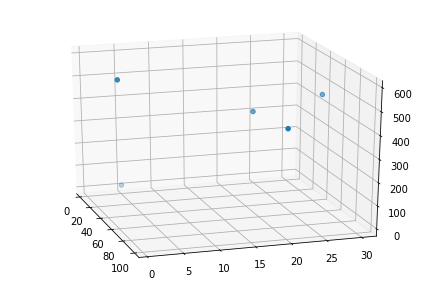

In [4]:
%matplotlib inline  
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = Axes3D(fig)

x = [100, 50, 50, 50, 1]
y = [20, 20, 30, 1, 5]
z = [442, 411, 463, 586, 10]
# c = np.array([i for i in np.arange(0, 1, 0.1)])
plot = ax.scatter(x,y,z)


In [41]:
z = np.array([np.random.uniform(5) for i in range(10)])
print(z)
normed = (z - np.mean(z))/np.std(z)
print(normed)

[3.53453276 1.46971561 2.55687463 4.45925293 3.11129937 3.99099261
 4.90873809 1.92239092 1.85814614 2.84596812]
[ 0.42725093 -1.45479875 -0.4638697   1.27011942  0.04148008  0.8433072
  1.67981836 -1.04219203 -1.10075018 -0.20036534]


In [55]:


%matplotlib inline  
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math, random

def fibonacci_sphere(samples=1,randomize=True):
    rnd = 1.
    if randomize:
        rnd = random.random() * samples

    points = []
    offset = 2./samples
    increment = math.pi * (3. - math.sqrt(5.));

    for i in range(samples):
        y = ((i * offset) - 1) + (offset / 2);
        r = math.sqrt(1 - pow(y,2))

        phi = ((i + rnd) % samples) * increment

        x = math.cos(phi) * r
        z = math.sin(phi) * r

        points.append([x,y,z])

    return points

test = fibonacci_sphere(1000)
print(len(test))

1000


In [58]:
x = [test[i][0] for i in range(len(test))]
y = [test[i][1] for i in range(len(test))]
z = [test[i][2] for i in range(len(test))]

fig = plt.figure()
ax = Axes3D(fig)

start = np.array((0,0,0))
end = np.array((0,0,1))

plot = ax.scatter(x,y,z)
ax.plot(start, end)
fig.colorbar(plot)

[-0.3353248479967013, -0.2715395302395961, 0.6338023552123843]